# DS701: Tools for Data Science - Midterm Challenge -- Sports

In this challenge, you will build a systematic analysis of LALIGA shot data from seasons 2015-16 through 2024-25.

### Objectives:
1. **Setup and Loade** the LALIGA shots dataset
2. **Exploratory Data Analysis (EDA)** - understand patterns, distributions, and relationships
3. **Clustering Analysis** - identify player archetypes based on shooting patterns
4. **Predictive Modeling** - build models to predict goal probability (excluding xG feature)
5. **Model Comparison** - compare our predictions with the existing xG metric
6. **Kaggle Submission** - prepare a submission for the Kaggle competition
7. **Summary and Conclusions** - summarize your findings and conclusions

You can use as many markdown and code cells as you want in your solutions.


---
## 1. Setup and Data Loading

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl") # sns.set_palette('husl') ensures your charts use a visually appealing, easy-to-distinguish set of colors, making your analysis clearer.
# If you want, you can test other palettes like 'deep', 'muted', 'bright', 'colorblind', or even custom lists. They simply change the look and readability of your charts.
%matplotlib inline
# %matplotlib inline is a special command (called a 'magic command') used in Jupyter notebooks. It tells the notebook to display all plots right inside the notebook, immediately after each cell is run.

# Set random seed for reproducibility
np.random.seed(42)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Suppress warnings fot clearner notebook
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
# Load the dataset
df = pd.read_csv('laliga_shots_train.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: 72,116 rows × 19 columns

First few rows:


,id,minute,result,X,Y,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,297163,44,Goal,0.8960,0.6270,Borja Bastón,a,1701,SetPiece,2018,RightFoot,10301,Athletic Club,Alaves,1,1,2019-04-27 12:00:00,NaN,Rebound
1,606888,49,MissedShots,0.8610,0.7230,Aimar Oroz,a,8424,OpenPlay,2024,RightFoot,27150,Espanyol,Osasuna,0,0,2024-12-14 13:00:00,Ante Budimir,Pass
2,140398,29,SavedShot,0.9250,0.3240,Gerard Moreno,h,2120,OpenPlay,2016,LeftFoot,3991,Espanyol,Las Palmas,4,3,2017-03-10 19:45:00,Felipe Caicedo,Throughball
3,336585,42,SavedShot,0.4400,0.5300,Youssef En-Nesyri,h,5169,OpenPlay,2019,LeftFoot,12177,Leganes,Celta Vigo,3,2,2019-12-08 17:30:00,Rubén Pérez,BallRecovery
4,575017,30,BlockedShot,0.8930,0.4570,Sergio Camello,h,7528,OpenPlay,2023,RightFoot,23004,Rayo Vallecano,Osasuna,2,1,2024-04-20 14:15:00,Jorge De Frutos,Cross


In [4]:
# Dataset overview
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

df.info()

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72116 entries, 0 to 72115
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               72116 non-null  int64  
 1   minute           72116 non-null  int64  
 2   result           72116 non-null  object 
 3   X                72116 non-null  float64
 4   Y                72116 non-null  float64
 5   player           72116 non-null  object 
 6   h_a              72116 non-null  object 
 7   player_id        72116 non-null  int64  
 8   situation        72116 non-null  object 
 9   season           72116 non-null  int64  
 10  shotType         72116 non-null  object 
 11  match_id         72116 non-null  int64  
 12  h_team           72116 non-null  object 
 13  a_team           72116 non-null  object 
 14  h_goals          72116 non-null  int64  
 15  a_goals          72116 non-null  int64  
 16  date             72116 non-null  object 


In [17]:
df.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction'],
      dtype='object')

In [12]:
len(df)

72116

In [ ]:
df.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0, 19310,
        8643])

In [19]:
[df.isnull().sum().values > 0]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
         True])]

In [47]:
# Check for missing values
print("\nMissing Values:")
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
# print(missing_df)
# print(type(missing_df['Missing_Count'] > 0))

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.to_string(index=False))


if len(missing_df) == 0:
    print("No missing values in required columns!")


Missing Values:
         Column  Missing_Count  Missing_Percentage
player_assisted          19310             26.7800
     lastAction           8643             11.9800


## Explanation of the columns


| Column | Description |
|--------|-------------|
| **id** | Unique shot identifier |
| **minute** | Minute of the match when shot occurred. Regularly two 45-minute halves. |
| **result** | Shot outcome (Goal, SavedShot, MissedShots, BlockedShot) |
| **X** | X-coordinate of shot location on pitch, where X = 0 is the defensive end (own goal) and X = 1 is the attacking end (opponent goal) |
| **Y** | Y-coordinate of shot location on pitch |
| **player** | Name of player taking the shot |
| **h_a** | Home ('h') or Away ('a') team indicator |
| **player_id** | Unique player identifier |
| **situation** | Match situation (OpenPlay, FromCorner, SetPiece, etc.) |
| **season** | Season year |
| **shotType** | Type of shot (RightFoot, LeftFoot, Head, OtherBodyPart) |
| **match_id** | Match identifier |
| **h_team** | Home team name |
| **a_team** | Away team name |
| **h_goals** | Home team goals at time of shot |
| **a_goals** | Away team goals at time of shot |
| **date** | Match date |
| **player_assisted** | Player who assisted |
| **lastAction** | Last action before shot |


---

#### Load the Test Set

We'll also need to load the test set so we can predict the results for it and
submit it for evaluation.

In [48]:
# Load the test set
df_test = pd.read_csv('laliga_shots_test_no_result.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df_test.shape[0]:,} rows × {df_test.shape[1]} columns")
print(f"\nFirst few rows:")
df_test.head()

Dataset loaded successfully!
Shape: 18,029 rows × 18 columns

First few rows:


,id,minute,X,Y,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,444146,63,0.9800,0.5430,Isi Palazón,a,9812,FromCorner,2021,LeftFoot,17284,Valencia,Rayo Vallecano,1,1,2021-11-27 15:15:00,NaN,Rebound
1,281129,31,0.9160,0.3710,Giannelli Imbula,a,861,OpenPlay,2018,LeftFoot,10183,Espanyol,Rayo Vallecano,2,1,2019-02-09 17:30:00,NaN,NaN
2,455491,26,0.8560,0.5460,Gerard Piqué,a,2092,FromCorner,2021,Head,17346,Alaves,Barcelona,0,1,2022-01-23 20:00:00,Pedri,Aerial
3,213542,36,0.8640,0.3850,Daniel Torres,a,5048,OpenPlay,2017,RightFoot,8232,Malaga,Alaves,0,3,2018-05-06 11:00:00,NaN,TakeOn
4,195341,37,0.8800,0.4160,Simone Zaza,a,1642,SetPiece,2017,LeftFoot,8098,Atletico Madrid,Valencia,1,0,2018-02-04 19:45:00,José Gayá,Cross


In [49]:
# Test set overview
print("=" * 80)
print("TEST SET OVERVIEW")
print("=" * 80)

df_test.info()

TEST SET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18029 entries, 0 to 18028
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18029 non-null  int64  
 1   minute           18029 non-null  int64  
 2   X                18029 non-null  float64
 3   Y                18029 non-null  float64
 4   player           18029 non-null  object 
 5   h_a              18029 non-null  object 
 6   player_id        18029 non-null  int64  
 7   situation        18029 non-null  object 
 8   season           18029 non-null  int64  
 9   shotType         18029 non-null  object 
 10  match_id         18029 non-null  int64  
 11  h_team           18029 non-null  object 
 12  a_team           18029 non-null  object 
 13  h_goals          18029 non-null  int64  
 14  a_goals          18029 non-null  int64  
 15  date             18029 non-null  object 
 16  player_assisted  13150 non-null  object 

---
## 2. Exploratory Data Analysis (EDA) (35 total points)

### 2.1 Target Variable Analysis - Shot Results (5 points)

Analyze the distribution of shot 'results' and:

1. print as a table with columns 'Result', 'Count', and 'Percentage'. (5 points)
2. Show a bar plot of the distribution of 'result' categories. (5 points)   
3. Show a pie chart of the distribution of 'result' categories. (5 points)
4. Calculate the goal conversion rate. (5 points)

### print as a table with columns 'Result', 'Count', and 'Percentage'. (5 points)

In [55]:
result_counts = df['result'].value_counts().reset_index()

In [56]:
result_counts.columns

Index(['result', 'count'], dtype='object')

In [60]:
result_counts = df['result'].value_counts().reset_index()
result_counts.columns = ['Result', 'Count']
result_counts['Percentage'] = (result_counts['Count'] / len(df) * 100).round(2)
print(result_counts)


        Result  Count  Percentage
0  MissedShots  28420     39.4100
1  BlockedShot  17218     23.8800
2    SavedShot  17018     23.6000
3         Goal   7778     10.7900
4   ShotOnPost   1464      2.0300
5      OwnGoal    218      0.3000


### Show a bar plot of the distribution of 'result' categories. (5 points)  

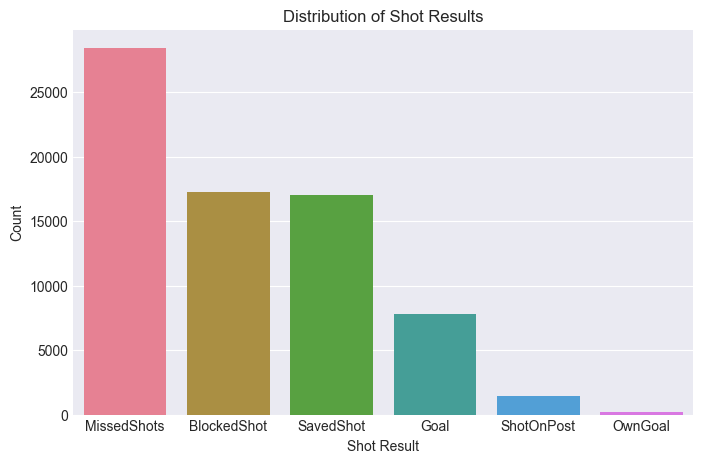

In [65]:
plt.figure(figsize=(8, 5)) 
sns.countplot(data=df, x='result', order=df['result'].value_counts().index, palette='husl')
plt.title('Distribution of Shot Results')
plt.xlabel('Shot Result')
plt.ylabel('Count')
plt.show()

### Show a pie chart of the distribution of 'result' categories. (5 points)

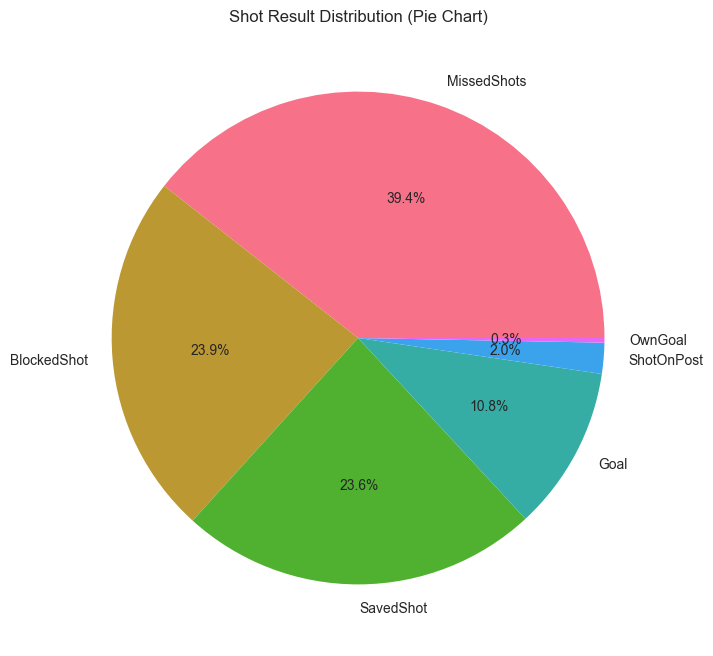

In [66]:
result_counts = df['result'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(result_counts)))
plt.title('Shot Result Distribution (Pie Chart)')
plt.show()

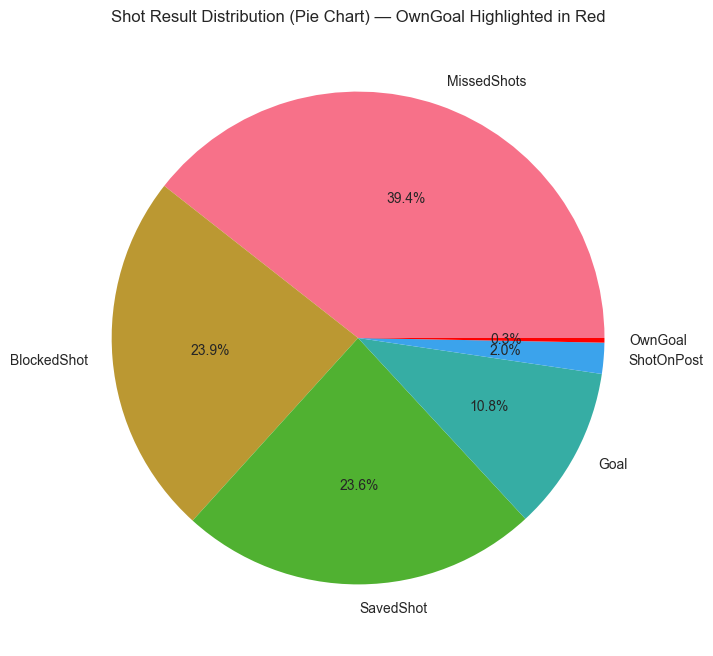

In [73]:
result_counts = df['result'].value_counts()
labels = result_counts.index.tolist()

# Assign colors: red for 'OwnGoal', others from 'husl'
colors = sns.color_palette('husl', len(labels))

# Find index of 'OwnGoal' and replace its color with a bright red
if 'OwnGoal' in labels:
    own_goal_index = labels.index('OwnGoal')
    colors[own_goal_index] = (1.0, 0.0, 0.0) 

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Shot Result Distribution (Pie Chart) — OwnGoal Highlighted in Red')
plt.show()


### Calculate the goal conversion rate. (5 points)

In [74]:
# Calculate goal conversion rate
num_goals = (df['result'] == 'Goal').sum()
total_shots = len(df)
goal_conversion_rate = num_goals / total_shots
print(f"Goal Conversion Rate: {goal_conversion_rate:.4f} ({goal_conversion_rate*100:.2f}%)")

Goal Conversion Rate: 0.1079 (10.79%)


In [ ]:
# This measurement highlights class imbalance since about 89% of shots are non-goal outcomes.

# Any predictive model will need to consider this imbalance to avoid bias toward the majority classes.

### 2.2 Numerical Features Analysis (5 points)

For the numerical features, calculate the following:
1. Statistical summary of the numerical features. (5 points)
2. Distribution plots for the key numerical features. (5 points)


In [77]:
df.select_dtypes(include=['number']).columns.tolist()

['id',
 'minute',
 'X',
 'Y',
 'player_id',
 'season',
 'match_id',
 'h_goals',
 'a_goals']

###  Statistical summary of the numerical features. (5 points)

In [78]:
# Show the statistical summary for all numerical columns
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print(df[numerical_features].describe())

               id     minute          X          Y  player_id     season  \
count  72116.0000 72116.0000 72116.0000 72116.0000 72116.0000 72116.0000   
mean  355666.1304    49.0744     0.8469     0.5049  4427.2750  2019.5004   
std   173622.9932    26.7468     0.0918     0.1298  3038.3767     2.8973   
min    83973.0000     0.0000     0.0040     0.0030    44.0000  2015.0000   
25%   186912.7500    27.0000     0.7850     0.4150  2229.0000  2017.0000   
50%   372120.5000    49.0000     0.8680     0.5030  2519.0000  2019.0000   
75%   510286.2500    72.0000     0.9100     0.5970  6917.0000  2022.0000   
max   636609.0000   106.0000     0.9990     0.9950 13629.0000  2024.0000   

        match_id    h_goals    a_goals  
count 72116.0000 72116.0000 72116.0000  
mean  13675.4030     1.5511     1.1950  
std    7887.4379     1.3204     1.1472  
min    1399.0000     0.0000     0.0000  
25%    8051.0000     1.0000     0.0000  
50%   12391.0000     1.0000     1.0000  
75%   19178.0000     2.0000 

### Distribution plots for the key numerical features. (5 points)

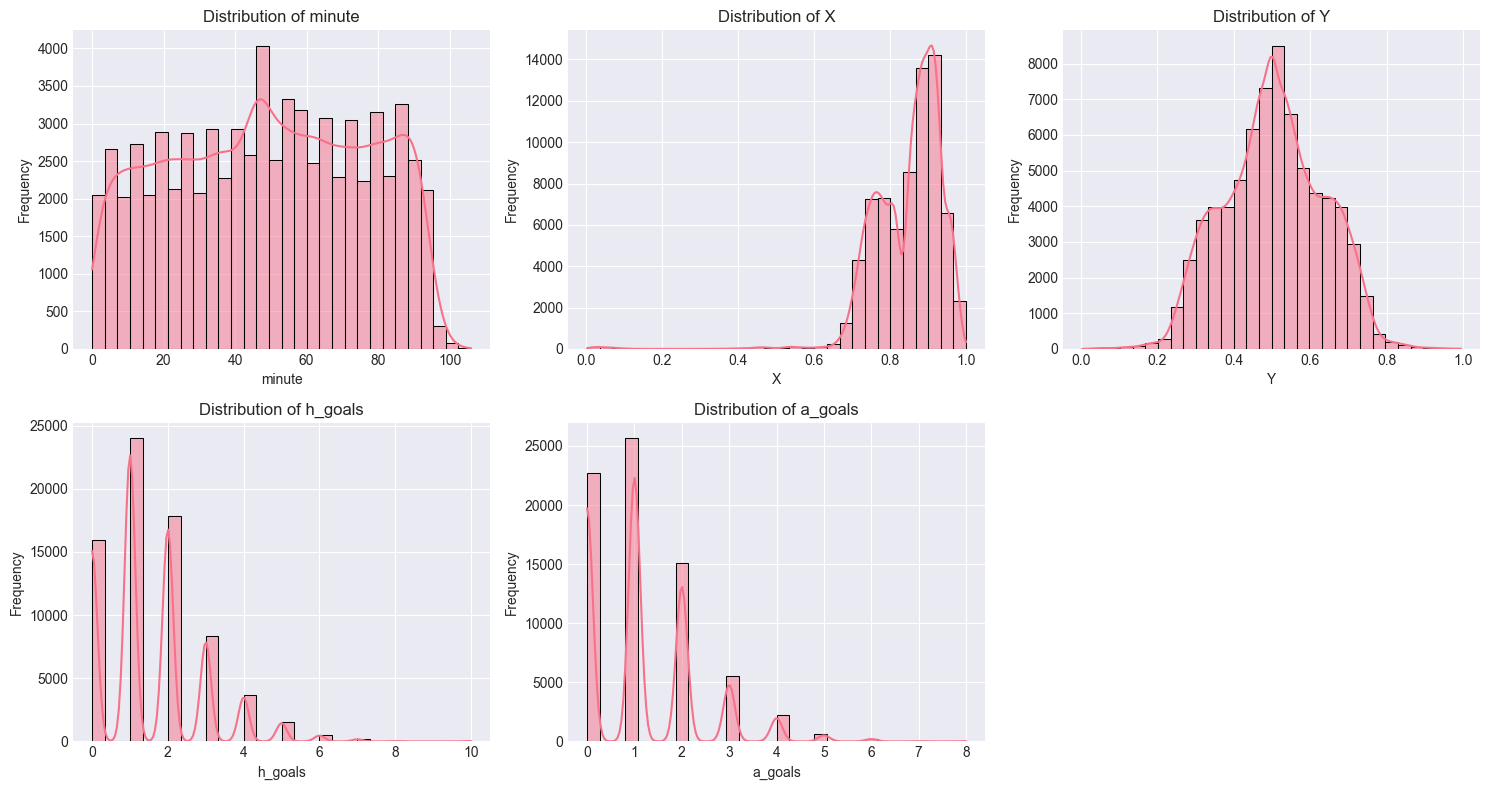

In [84]:
# List of key numerical features as per your dataset
features_to_plot = ['minute', 'X', 'Y', 'h_goals', 'a_goals']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot, 1):
    # enumerate(features_to_plot, 1) makes i start at 1, so your first plot lands at position 1 (top left), next at 2, etc.
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)  # Histogram with KDE curve
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [80]:
# Shots mostly come from good positions (high X, middle Y).

# Score is usually low during shots—most games are close.

# Shots happen all game but with a bit more frequency at common stoppage times.

### 2.3 Shot Location Analysis (X, Y Coordinates) (5 points)

Create a scatter plot of shot locations colored by result. (10 points)

Calculate the average X and Y coordinates for goals. (5 points)

### Create a scatter plot of shot locations colored by result. (10 points)

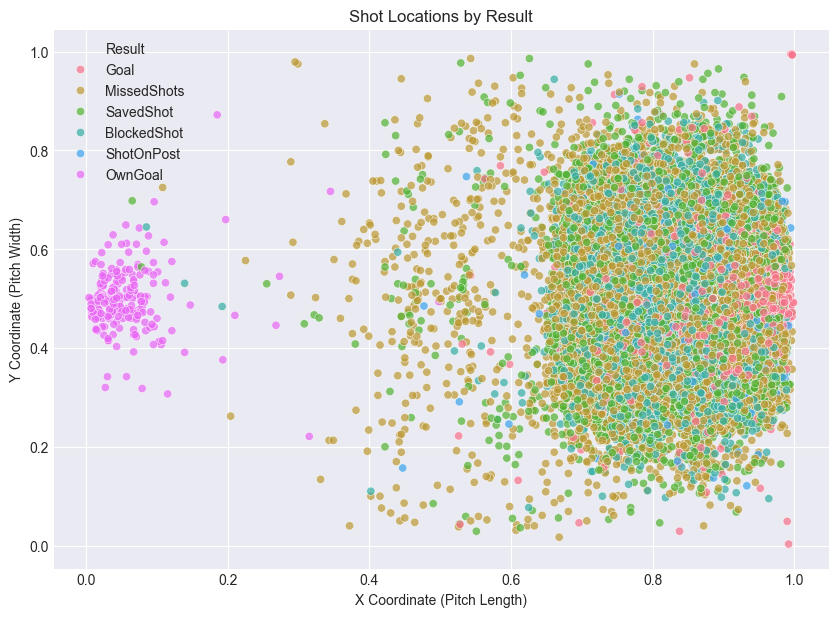

In [92]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='X', y='Y', hue='result', palette='husl', alpha=0.7)
plt.title('Shot Locations by Result')
plt.xlabel('X Coordinate (Pitch Length)')
plt.ylabel('Y Coordinate (Pitch Width)')
plt.legend(title='Result')
plt.show()


In [82]:
# "alpha=0.7" makes points semi-transparent to help with overplotting.

### Calculate the average X and Y coordinates for goals. (5 points)

In [83]:
goal_shots = df[df['result'] == 'Goal']
avg_x = goal_shots['X'].mean()
avg_y = goal_shots['Y'].mean()
print(f"Average X for goals: {avg_x:.4f}")
print(f"Average Y for goals: {avg_y:.4f}")

Average X for goals: 0.8976
Average Y for goals: 0.5016


### 2.4 Categorical Features Analysis (5 points)

Show the bar plots for each of the categorical features. (10 points)

In [96]:
df['lastAction'].value_counts()

lastAction
Pass               24921
Cross              10676
Aerial              5686
Standard            4009
TakeOn              3657
Chipped             3564
Rebound             2996
BallRecovery        1822
Throughball         1599
HeadPass            1536
BallTouch           1428
Dispossessed         353
LayOff               353
Tackle               188
Foul                 147
CornerAwarded        133
BlockedPass           97
Interception          64
Goal                  48
End                   40
Challenge             37
Clearance             29
OffsidePass           21
Card                  17
SubstitutionOn        14
Save                   9
GoodSkill              7
KeeperPickup           5
ShieldBallOpp          4
FormationChange        4
Start                  3
OffsideProvoked        2
ChanceMissed           1
KeeperSweeper          1
Smother                1
PenaltyFaced           1
Name: count, dtype: int64

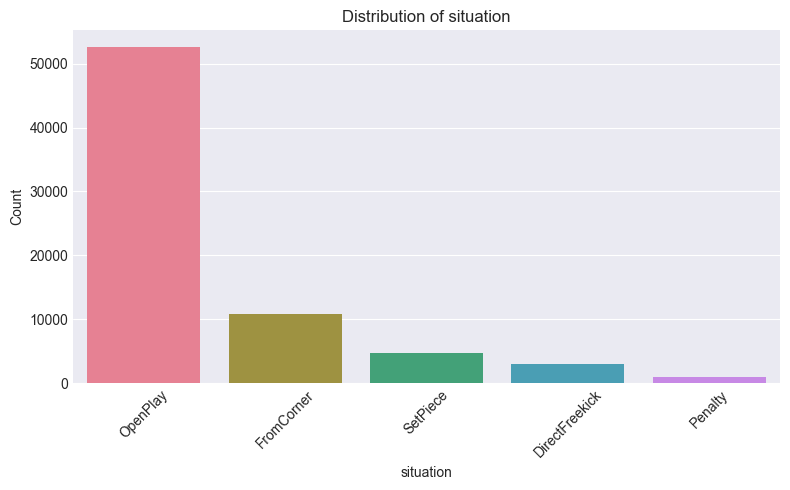

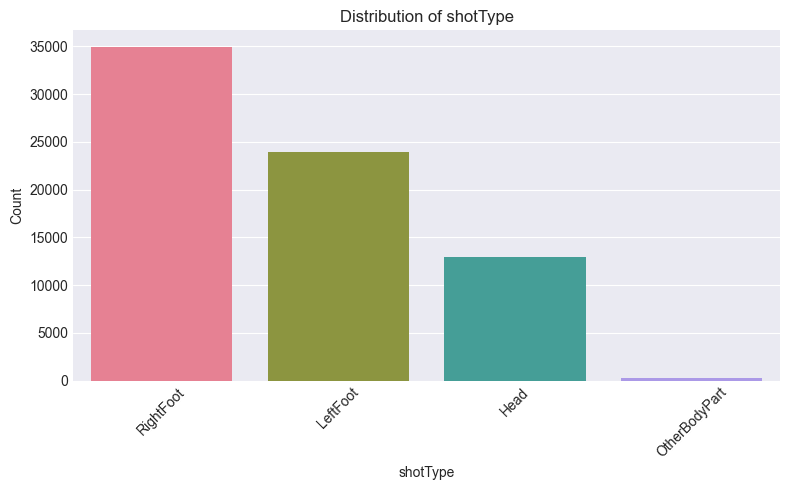

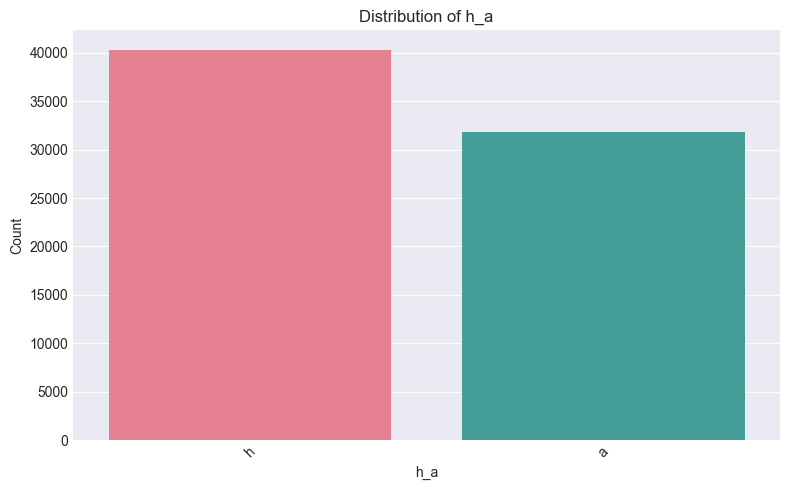

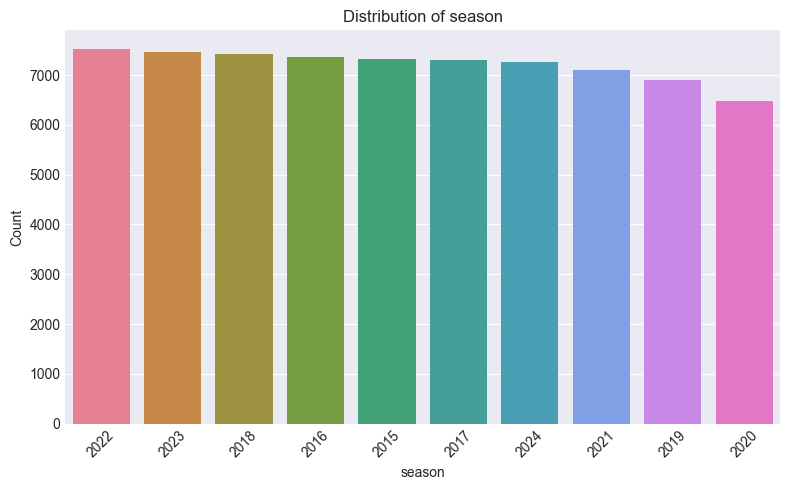

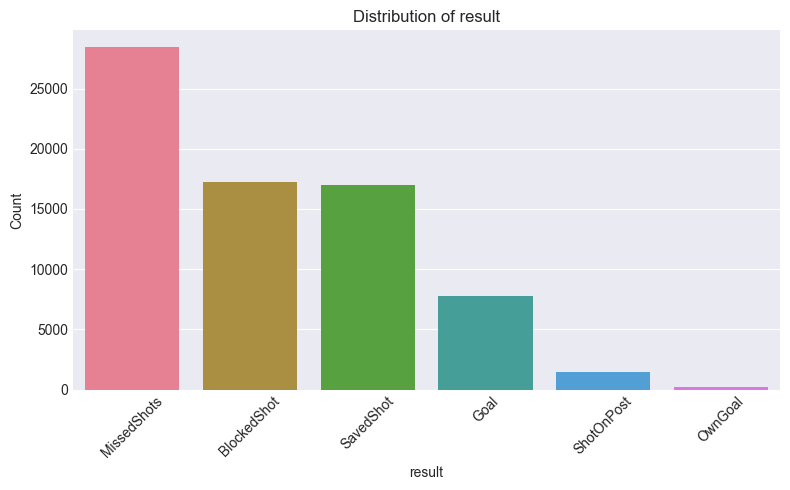

In [98]:
categorical_features = ['situation', 'shotType', 'h_a', 'season', 'result']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))  # Adjust width and height here; try (10, 6) for even bigger
    sns.countplot(data=df, x=feature, palette='husl', order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 2.5 Goal Conversion by Categorical Features (5 points)

Calculate the goal conversion rate by each of the categorical features, 'situation', 'shotType', and 'h_a'. (10 points)
* Display the results in a table with columns '<Category>', 'Total Shots', 'Goal Rate (%)'.

Display the results in bar plots. (5 points)


Goal Conversion Rate by Situation:

     Situation  Total Shots  Goal Rate (%)
DirectFreekick         3006         5.8200
    FromCorner        10797         8.1000
      OpenPlay        52614        10.6100
       Penalty         1003        75.6700
      SetPiece         4696         8.2200


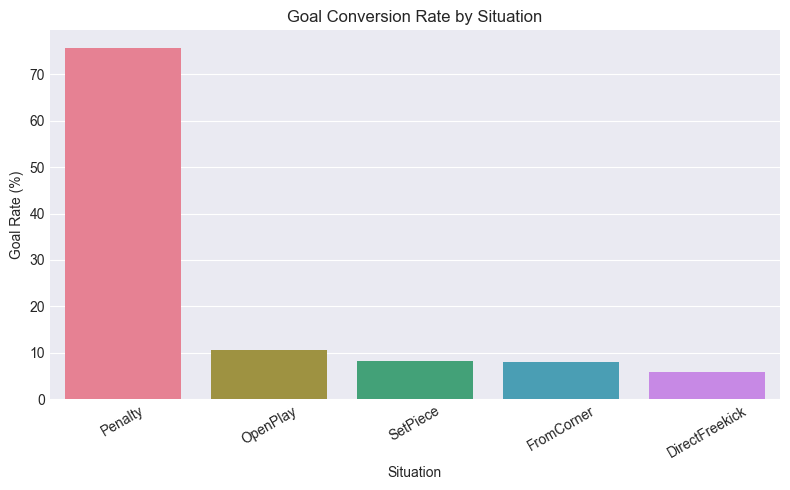


Goal Conversion Rate by Shottype:

     Shottype  Total Shots  Goal Rate (%)
         Head        12916         9.8700
     LeftFoot        23993        10.5300
OtherBodyPart          274        14.2300
    RightFoot        34933        11.2700


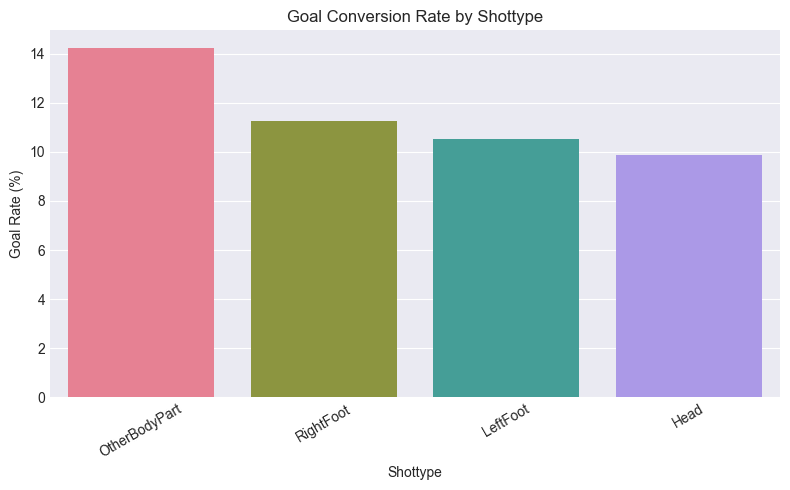


Goal Conversion Rate by H_a:

H_a  Total Shots  Goal Rate (%)
  a        31813        10.5800
  h        40303        10.9400


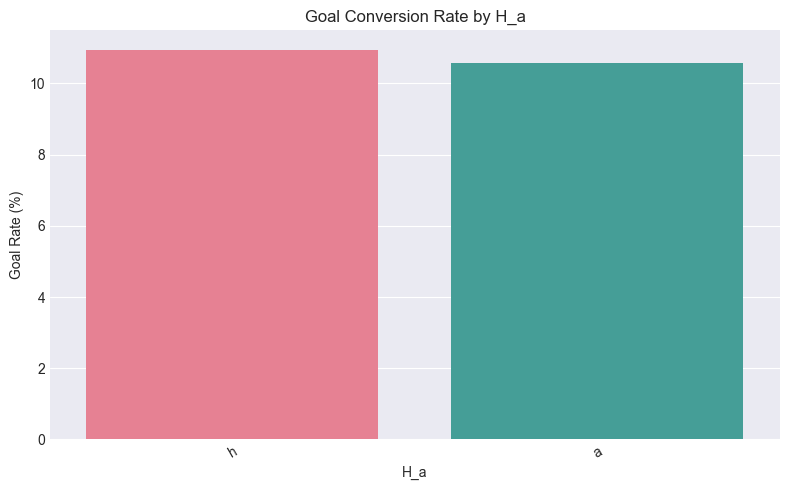

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['situation', 'shotType', 'h_a']

for feature in cat_features:
    # Count total shots per category
    group = df.groupby(feature)
    total_shots = group.size()
    goals = group.apply(lambda x: (x['result'] == 'Goal').sum())
    goal_rate = (goals / total_shots).round(4) * 100  # as percentage

    conv_df = pd.DataFrame({
        feature.capitalize(): total_shots.index,
        'Total Shots': total_shots.values,
        'Goal Rate (%)': goal_rate.values
    })

    print(f"\nGoal Conversion Rate by {feature.capitalize()}:\n")
    print(conv_df.to_string(index=False))

    # Bar plot for goal conversion rate
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=conv_df,
        x=feature.capitalize(),
        y='Goal Rate (%)',
        palette='husl',
        order=conv_df.sort_values('Goal Rate (%)', ascending=False)[feature.capitalize()]
    )
    plt.title(f'Goal Conversion Rate by {feature.capitalize()}')
    plt.ylabel('Goal Rate (%)')
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


### 2.6 Player Analysis (10 points)

Analyze the players' performance by calculating the following:
1. How many total matches are present in the dataset? (5 points)
2. How many total matches were played in each season? (5 points)
3. Which 3 players played the most matches in each season? (5 points)
4. How many matches did each player play and show the top 10 players? (5 points)
5. How many goals were scored by each player and show the top 10 players? (5 points)
6. Calculate the average number of goals per game for each player and show the top 10 players who played at least 100 matches. (5 points)


### How many total matches are present in the dataset?

In [104]:
num_matches = df['match_id'].nunique()
print(f'Total matches in the dataset: {num_matches}')

Total matches in the dataset: 3800


### How many total matches were played in each season?

In [105]:
# Count unique matches per season:
matches_per_season = df.groupby('season')['match_id'].nunique().reset_index()
matches_per_season.columns = ['Season', 'Total Matches']
print("Matches played in each season:")
print(matches_per_season.to_string(index=False))

Matches played in each season:
 Season  Total Matches
   2015            380
   2016            380
   2017            380
   2018            380
   2019            380
   2020            380
   2021            380
   2022            380
   2023            380
   2024            380


### Which 3 players played the most matches in each season?

In [108]:
df.groupby(['season', 'player'])['match_id'].nunique().reset_index()

,season,player,match_id
0,2015,Abdoulaye Doucouré,7
1,2015,Abraham,8
2,2015,Adalberto Peñaranda,14
3,2015,Aderlan Santos,7
4,2015,Adil Rami,8
...,...,...,...
4582,2024,Ángel Ortiz,2
4583,2024,Óscar Mingueza,21
4584,2024,Óscar Rodríguez,20
4585,2024,Óscar Trejo,4


In [107]:
# For each season: for each player, count unique matches played, then select top 3 players
player_matches = df.groupby(['season', 'player'])['match_id'].nunique().reset_index()
player_matches.columns = ['Season', 'Player', 'Matches Played']

# For each season, sort by matches played, select top 3
top3_per_season = player_matches.sort_values(['Season', 'Matches Played'], ascending=[True, False])

# Group by season and take top 3 for each
top3_list = top3_per_season.groupby('Season').head(3)

print("Top 3 players by matches played in each season:")
print(top3_list.to_string(index=False))

Top 3 players by matches played in each season:
 Season               Player  Matches Played
   2015    Cristiano Ronaldo              36
   2015          Luis Suárez              34
   2015         Rubén Castro              34
   2016         Lionel Messi              34
   2016          Raúl García              34
   2016         Rubén Castro              32
   2017               Adrián              39
   2017        Gerard Moreno              34
   2017       Iñaki Williams              32
   2018       Borja Iglesias              33
   2018         Lionel Messi              33
   2018    Antoine Griezmann              32
   2019        Karim Benzema              36
   2019          Raúl García              34
   2019         Lionel Messi              33
   2020          Luis Suárez              43
   2020         Lionel Messi              35
   2020               Joselu              33
   2021          Luis Suárez              53
   2021       Iñaki Williams              33
   2021

### How many matches did each player play and show the top 10 players?

In [109]:
# Group by player, count the number of unique matches they played
player_match_counts = df.groupby('player')['match_id'].nunique().reset_index()
player_match_counts.columns = ['Player', 'Matches Played']

# Sort descending and get top 10
top10_players = player_match_counts.sort_values('Matches Played', ascending=False).head(10)

print("Top 10 players by matches played:")
print(top10_players.to_string(index=False))


Top 10 players by matches played:
           Player  Matches Played
Antoine Griezmann             280
   Iñaki Williams             274
      Luis Suárez             272
       Iago Aspas             272
    Gerard Moreno             234
    Karim Benzema             229
      Raúl García             219
  Mikel Oyarzabal             217
     Ángel Correa             202
     Lionel Messi             200


### How many goals were scored by each player and show the top 10 players?

In [114]:
df[df['result'] == 'Goal'].groupby('player').size()

player
Abderrahmane Rebbach      1
Abdessamad Ezzalzouli     8
Abdoulaye Ba              1
Abdul Mumin               3
Abdón Prats               6
                         ..
Óscar Duarte              3
Óscar Mingueza            5
Óscar Plano              10
Óscar Rodríguez          13
Óscar Trejo               5
Length: 1010, dtype: int64

In [110]:
# Only include rows where result is 'Goal'
goal_counts = df[df['result'] == 'Goal'].groupby('player').size().reset_index(name='Goals')

# Sort in descending order to get top goal-scorers
top10_goal_scorers = goal_counts.sort_values('Goals', ascending=False).head(10)

print("Top 10 players by goals scored:")
print(top10_goal_scorers.to_string(index=False))

Top 10 players by goals scored:
           player  Goals
      Luis Suárez    155
     Lionel Messi    142
    Karim Benzema    130
       Iago Aspas    117
Antoine Griezmann    104
    Gerard Moreno     94
  Mikel Oyarzabal     69
Cristiano Ronaldo     65
     Willian José     65
   Iñaki Williams     64


### Calculate the average number of goals per game for each player and show the top 10 players who played at least 100 matches.

In [115]:
# Matches played per player
matches_played = df.groupby('player')['match_id'].nunique().reset_index(name='Matches')
# Goals scored per player
goals_scored = df[df['result'] == 'Goal'].groupby('player').size().reset_index(name='Goals')
# Merge data
player_summary = matches_played.merge(goals_scored, on='player', how='left').fillna({'Goals': 0})
# Calculate average goals/game
player_summary['Avg_Goals_per_Game'] = player_summary['Goals'] / player_summary['Matches']
# Filter to those with at least 100 matches
regular_players = player_summary[player_summary['Matches'] >= 100]
# Sort and show the top 10
top10_avg_goal_players = regular_players.sort_values('Avg_Goals_per_Game', ascending=False).head(10)
print("Top 10 players (min 100 matches) by avg. goals per game:")
print(top10_avg_goal_players[['player', 'Matches', 'Goals', 'Avg_Goals_per_Game']].to_string(index=False))


Top 10 players (min 100 matches) by avg. goals per game:
           player  Matches    Goals  Avg_Goals_per_Game
     Lionel Messi      200 142.0000              0.7100
      Luis Suárez      272 155.0000              0.5699
    Karim Benzema      229 130.0000              0.5677
    Álvaro Morata      103  50.0000              0.4854
 Cristhian Stuani      111  52.0000              0.4685
Alexander Sørloth      100  46.0000              0.4600
     Ante Budimir      146  63.0000              0.4315
       Iago Aspas      272 117.0000              0.4301
      Gareth Bale      107  45.0000              0.4206
    Gerard Moreno      234  94.0000              0.4017


### 2.7 Feature Engineering for Analysis (5 points)

You may want to perform some feature engineering to create new features that will be useful for modeling.

Create derived features that will be useful for modeling. (10 points)


#### is_goal (binary target)

In [116]:
# 1 if the shot resulted in a goal, 0 otherwise
df['is_goal'] = (df['result'] == 'Goal').astype(int)

#### distance_to_goal

In [117]:
# distance_to_goal

# Euclidean distance from the shot to the center of the goal (assuming goal is at X=1, Y=0.5)

goal_x, goal_y = 1.0, 0.5
df['distance_to_goal'] = ((df['X'] - goal_x) ** 2 + (df['Y'] - goal_y) ** 2) ** 0.5

#### angle_to_goal

In [119]:
# Angle (in radians) from shot to goal center, helpful for understanding sharpness of shot
df['angle_to_goal'] = np.arctan2((0.5 - df['Y']).abs(), (1.0 - df['X']).clip(lower=1e-5))


### is_open_play

In [120]:
# 1 if the situation is open play, 0 for set piece, penalty, etc.

df['is_open_play'] = (df['situation'] == 'OpenPlay').astype(int)


#### period (categorical time bin)

In [121]:
# Early (0-15), Mid (16-75), Late (76+)

def time_period(minute):
    if minute <= 15:
        return 'Early'
    elif minute <= 75:
        return 'Mid'
    else:
        return 'Late'
df['period'] = df['minute'].apply(time_period)


#### home_team_ahead

In [122]:
# 1 if home team is leading at the time of the shot

df['home_team_ahead'] = (df['h_goals'] > df['a_goals']).astype(int)


In [ ]:
# distance_to_goal and angle_to_goal: Better reflect shot difficulty and likelihood of conversion

# is_goal: Standardized numeric target for modeling

# is_open_play and period: Capture match dynamics/context

# home_team_ahead: Game state, which may change shot quality

In [123]:
df

,id,minute,result,X,Y,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,is_goal,distance_to_goal,angle_to_goal,is_open_play,period,home_team_ahead
0,297163,44,Goal,0.8960,0.6270,Borja Bastón,a,1701,SetPiece,2018,RightFoot,10301,Athletic Club,Alaves,1,1,2019-04-27 12:00:00,NaN,Rebound,1,0.1641,0.8846,0,Mid,0
1,606888,49,MissedShots,0.8610,0.7230,Aimar Oroz,a,8424,OpenPlay,2024,RightFoot,27150,Espanyol,Osasuna,0,0,2024-12-14 13:00:00,Ante Budimir,Pass,0,0.2628,1.0134,1,Mid,0
2,140398,29,SavedShot,0.9250,0.3240,Gerard Moreno,h,2120,OpenPlay,2016,LeftFoot,3991,Espanyol,Las Palmas,4,3,2017-03-10 19:45:00,Felipe Caicedo,Throughball,0,0.1913,1.1680,1,Mid,1
3,336585,42,SavedShot,0.4400,0.5300,Youssef En-Nesyri,h,5169,OpenPlay,2019,LeftFoot,12177,Leganes,Celta Vigo,3,2,2019-12-08 17:30:00,Rubén Pérez,BallRecovery,0,0.5608,0.0535,1,Mid,1
4,575017,30,BlockedShot,0.8930,0.4570,Sergio Camello,h,7528,OpenPlay,2023,RightFoot,23004,Rayo Vallecano,Osasuna,2,1,2024-04-20 14:15:00,Jorge De Frutos,Cross,0,0.1153,0.3821,1,Mid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72111,622122,39,BlockedShot,0.8560,0.4360,Omar Mascarell,a,2456,OpenPlay,2024,LeftFoot,27243,Athletic Club,Mallorca,1,1,2025-03-09 17:30:00,NaN,NaN,0,0.1576,0.4182,1,Mid,0
72112,227476,53,BlockedShot,0.9130,0.3240,Darko Brasanac,h,5037,OpenPlay,2018,LeftFoot,10007,Alaves,Getafe,1,1,2018-09-27 18:00:00,Ibai Gómez,TakeOn,0,0.1963,1.1117,1,Mid,0
72113,141493,84,SavedShot,0.7260,0.5700,João Cancelo,a,2379,OpenPlay,2016,LeftFoot,3938,Real Betis,Valencia,0,0,2017-02-11 12:00:00,Nani,Pass,0,0.2828,0.2501,1,Late,0
72114,590017,57,SavedShot,0.9720,0.6610,Alfon,a,9241,OpenPlay,2024,LeftFoot,27018,Osasuna,Celta Vigo,3,2,2024-09-01 15:00:00,Hugo Álvarez,Pass,0,0.1634,1.3986,1,Mid,1


### 2.8 Correlation Analysis (10 points)

Calcuate and display the correlation matrix of the numerical features and display as a heatmap. (10 points)

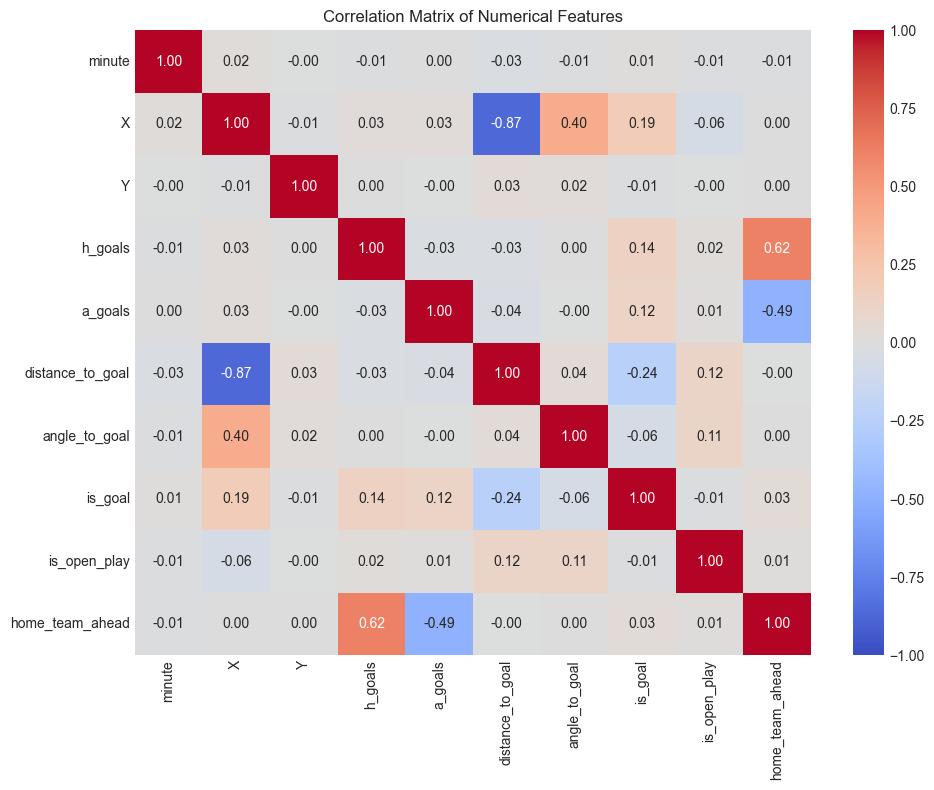

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose relevant numerical features for correlation
num_features = [
    'minute', 'X', 'Y', 'h_goals', 'a_goals', 
    'distance_to_goal', 'angle_to_goal', 'is_goal',
    'is_open_play', 'home_team_ahead'
]

corr_matrix = df[num_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [125]:
# X and distance_to_goal (-0.87): As X increases (closer to opponent's goal), distance decreases—makes sense. This means these features have overlapping info. Consider removing one for modeling to avoid redundancy.

---

## 3. Clustering Analysis: Player Shooting Archetypes (40 total points)

Identify different types of goal scorers based on their shooting patterns.

Perform K-Means clustering on the player-level statistics. (15 points)
 * Use Silhouette Score to determine the optimal number of clusters.
 * Print a table of the cluster centers.

Based on the cluster centers, assign interpretable names to the clusters. (5 points)
  * These could be for example:
    * Penalty Specialists
    * Aerial Specialists
    * Poachers (Close-range)
    * Long-range Shooters
    * Mixed Style
  * Justify your choices.

Display the results in a table with columns 'Cluster', 'Archetype', 'Total Players', and 'Players'. (10 points)

Visualize the clusters using PCA. (10 points)



### Aggregate Player Features for Clustering

In [126]:
# Aggregate relevant features per player
player_features = df.groupby('player').agg(
    total_shots=('is_goal', 'count'),
    total_goals=('is_goal', 'sum'),
    matches_played=('match_id', pd.Series.nunique),
    avg_distance=('distance_to_goal', 'mean'),
    avg_angle=('angle_to_goal', 'mean'),
    pct_right_foot=('shotType', lambda x: (x == 'RightFoot').mean()),
    pct_left_foot=('shotType', lambda x: (x == 'LeftFoot').mean()),
    pct_header=('shotType', lambda x: (x == 'Head').mean()),
    pct_open_play=('is_open_play', 'mean')
).reset_index()
player_features['shots_per_match'] = player_features['total_shots'] / player_features['matches_played']
player_features['goal_rate'] = player_features['total_goals'] / player_features['total_shots']

# Fill any missing values
player_features = player_features.fillna(0)


### Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
features_for_cluster = [
    'shots_per_match', 'goal_rate', 'avg_distance', 'avg_angle',
    'pct_right_foot', 'pct_left_foot', 'pct_header', 'pct_open_play'
]

scaler = StandardScaler()
X = scaler.fit_transform(player_features[features_for_cluster])


### Find Optimal Number of Clusters (Silhouette Score)

In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

sil_scores = []
K_vals = range(2, 10)
for k in K_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

best_k = K_vals[np.argmax(sil_scores)]
print(f"Optimal number of clusters by silhouette score: {best_k}")


Optimal number of clusters by silhouette score: 3


### Fit Final K-Means Model and Assign Clusters

In [129]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
player_features['cluster'] = kmeans.fit_predict(X)


### Interpret Cluster Centers

In [130]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=features_for_cluster)
print("\nCluster Centers (archetypes):")
print(cluster_summary.round(2))



Cluster Centers (archetypes):
   shots_per_match  goal_rate  avg_distance  avg_angle  pct_right_foot  \
0           1.4000     0.0700        0.2300     0.6400          0.1300   
1           1.2300     0.0700        0.1500     0.5100          0.2300   
2           1.4700     0.0800        0.2200     0.5800          0.7200   

   pct_left_foot  pct_header  pct_open_play  
0         0.7900      0.0800         0.7700  
1         0.1100      0.6500         0.2400  
2         0.1600      0.1100         0.7800  


### Display Results Table

In [131]:
table = player_features.groupby('cluster').agg(
    Total_Players=('player', 'count'),
    Players=('player', lambda x: ', '.join(x.head(5)))
).reset_index()
table['Archetype'] = [
    # Fill with names based on above interpretation (e.g., "Poacher", "Long-range Shooter", etc.)
    f"Archetype {i+1}" for i in table['cluster']
]

print("\nCluster - Archetype Table:")
print(table[["cluster", "Archetype", "Total_Players", "Players"]].to_string(index=False))



Cluster - Archetype Table:
 cluster   Archetype  Total_Players                                                                             Players
       0 Archetype 1            435      Aarón Martín, Abdoulaye Diaby, Abdoulaye Keita, Abdul Rahman Baba, Abdón Prats
       1 Archetype 2            334              Abdelkabir Abqar, Abdoulaye Ba, Abdul Mumin, Aderlan Santos, Adil Rami
       2 Archetype 3            879 Abderrahmane Rebbach, Abdessamad Ezzalzouli, Abdoulaye Doucouré, Abel Ruiz, Abraham


### Visualize Clusters using PCA

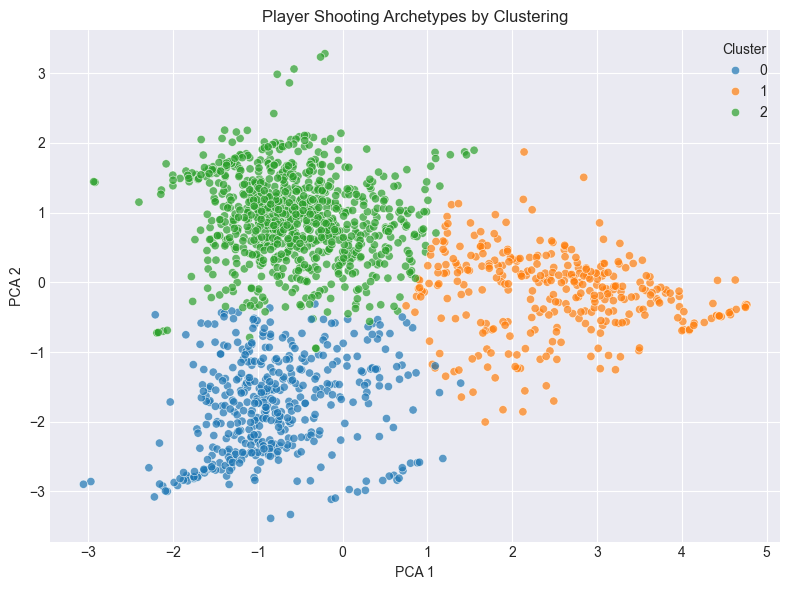

In [134]:
# Choose a high-contrast color palette for 3 clusters
cluster_palette = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}  # Blue, Orange, Green
# Alternatively, for colorblind safety, use:
# cluster_palette = {0: '#0072B2', 1: '#D55E00', 2: '#CC79A7'}

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], 
    y=X_pca[:,1], 
    hue=player_features['cluster'], 
    palette=cluster_palette,       
    alpha=0.7
)
plt.title('Player Shooting Archetypes by Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


### 

---
## 4. Predictive Modeling: Goal Probability Prediction (50 total points + up to 15 bonus points)

Now we'll build models to predict the probability of scoring a goal.
We'll then compare our model predictions with the actual xG values.

Define and train the following models:
1. Logistic Regression (25 points)
2. Random Forest (25 points)
3. Bonus Models (feel free to use any model you want)  (**Bonus:** 15 points)


Evaluate each model using the following metrics and display the results in a table:
* Accuracy
* Precision
* Recall
* F1-Score
* ROC-AUC




### 4.2 Model 1: Logistic Regression (Baseline)

### 4.3 Model 2: Random Forest Classifier

### 4.4 Model 3: Bonus Models

---

## 5. Model Comparison and Analysis (30 total points)

Create a grouped bar plot to compare each of those metrics across all models. (10 points)

Plot the ROC curves for all models. (10 points)

Plot the confusion matrices for all models. (10 points)


### 5.1 Grouped Bar Plot Comparison

### 5.2 ROC Curves Comparison

### 5.3 Confusion Matrices Visualization

---

## 6.0 Kaggle Submission (15 total points + up to 10 bonus points)

### Prepare a submission for the Kaggle competition.

1. Load the test dataset, laliga_shots_test_no_result.csv
2. Preprocess the test dataset in the same way you did for the training dataset.
3. Make predictions for the test dataset using your best model.
4. Create a submission file and upload it to Kaggle.

The submission file should be a csv file with the following columns:

| is_goal | goal_prob |
|---------|-----------|
| 0       | 0.234      |
| 1       | 0.634       |
| 0       | 0.142     |

We will evaluate using F1-score.


The top 10 finishers get an additional 10 bonus points.

The 11-20 finishers get an additional 5 bonus points.




---
## 7. Summary and Conclusions (10 points)

Summaryize your findings and conclusions. (10 points)

Among other things, answer the following questions:
* What did you learn from this analysis?
* Were there any unexpected findings?
* What would you do differently if you had more time?


---